# CapStone- Customer Segmentation RFM 

NAME: Harrison Ngo

#### The goal of this class is for the students to put in practice all they had to learn during the MSBA program at UTD and leverage their experience to become a data storyteller. At the end of the semester, each group will have 5 minutes to tell their story to the Board of Directors of XYZ Hardware Wholesaler which is willing to invest USD 5 million in 2020.

# Expected milestones during the semester
### Getting the basics
1. Understand the Industrial distribution vertical by reading the information given . Also each student will do desk research to get acquaint with 
2. Use the links below to have examples on how a presentation should look like
https://www.stephenlevin.co/5-presentation-tips-data-storytelling/

https://offers.hubspot.com/presenting-data-people-cant-ignore?utm_source=hscm-Infogram-20180312-presenting-data-can%27t-ignore-oth

https://www.youtube.com/watch?v=zInG1BUQZek

3. Refresh segmentation concepts
https://www.cleverism.com/complete-guide-abc-analysis-customer-segmentation-inventory/

https://www.putler.com/rfm-analysis/

### Customer and product segmentation
Segment customers and products using a XYZ Hardware Wholesaler transactional data by defining/building features and using an appropriate clustering technique

In [1]:
#Import necessary libraries
!pip install pandas --upgrade
!pip install pyxlsb
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline
import numpy as np
import pandas as pd
from pyxlsb import open_workbook as open_xlsb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import datetime as dt
import warnings
import os

Requirement already up-to-date: pandas in c:\users\harri\anaconda3\lib\site-packages (1.0.1)


C:\Users\harri\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Loading Data

In [2]:
data = pd.read_csv('mergedUpated.csv')
data.rename(columns={'ExtPrice': 'TotalSales', 'COST': 'UnitCost', 'ExtCost': 'TotalCost', 'Sale_P': 'SalesRep'}, inplace=True)
data['InvoiceDate'] =  pd.to_datetime(data['InvoiceDate'])

In [3]:
data.head(10)

,Unnamed: 0,InvoiceNo,StockCode,QuantityShipped,Year,InvoiceDate,UnitPrice,TotalSales,CustomerID,Country,GM%,Shipper,UnitCost,TotalCost,Region,SalesRep,Commodity,SalePerson
0,0,568200,PADS,5.000,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,0.000023,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,GRACE J
1,1,568375,BANK CHARGES,5.000,2017,2017-09-26,0.999976,4.999883,13405,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,Studs,JEFF Y
2,2,561226,PADS,5.000,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,-0.000067,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,GRACE J
3,3,2550193,PADS,7.080,2018,2018-06-08,0.999962,7.079728,13952,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL,PETER T,Studs,PETER T
4,4,550193,PADS,5.000,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,Studs,PETER T
5,5,561047,16045,1.075,2017,2017-07-24,1.003816,1.079102,16948,United Kingdom,-0.001392,UPS ground 2nd day,1.005214,1.080605,WEST,JEFF Y,Bolt,JEFF Y
6,6,560259,16045,6.450,2017,2017-07-17,1.007168,6.496234,13654,United Kingdom,0.001941,UPS Next day Air,1.005214,6.483628,CENTRAL,GAIL H,Bolt,GAIL H
7,7,2558389,16045,46.956,2018,2018-07-09,1.000832,46.995067,14383,United Kingdom,-0.004378,UPS Next day Air,1.005214,47.200809,SOUTH,GRACE J,Bolt,GRACE J
8,8,558389,16045,3.225,2017,2017-06-29,1.012288,3.264629,14383,United Kingdom,0.006989,UPS Next day Air,1.005214,3.241814,SOUTH,GRACE J,Bolt,GRACE J
9,9,C536757,84347,2.000,2016,2016-12-02,1.002964,2.005928,15838,United Kingdom,0.240951,UPS ground 2nd day,0.761299,1.522598,NORTH,JOHN A,Screw,JOHN A


In [4]:
data.tail(10)

,Unnamed: 0,InvoiceNo,StockCode,QuantityShipped,Year,InvoiceDate,UnitPrice,TotalSales,CustomerID,Country,GM%,Shipper,UnitCost,TotalCost,Region,SalesRep,Commodity,SalePerson
566299,566299,2550354,M,19.33200,2018,2018-05-21,10.845550,209.666173,13811,Germany,1.000000,UPS ground 3rd day,0.000000,0.000000,CENTRAL,PETER T,Studs,PETER T
566300,566300,557112,DOT,17.41500,2017,2017-06-16,13.776868,239.924156,15012,United Kingdom,0.868385,Delivery Truck,1.813247,31.577700,NORTH,JOHN A,Studs,JOHN A
566301,566301,2546480,22656,589.68000,2018,2018-07-08,142.157500,83827.434600,13452,United Kingdom,0.850510,Delivery Truck,21.251131,12531.367140,CENTRAL,GAIL H,Washer,GAIL H
566302,566302,2540647,22655,259.77375,2018,2018-05-16,62.212500,16161.174420,17406,United Kingdom,0.588627,UPS ground 2nd day,25.592515,6648.263517,NORTH,JOHN A,Washer,JOHN A
566303,566303,540647,22655,257.58000,2017,2017-01-10,130.328000,33569.886240,17406,United Kingdom,0.803630,UPS ground 2nd day,25.592515,6592.119938,NORTH,JOHN A,Washer,JOHN A
566304,566304,545332,M,13.50000,2017,2017-03-01,12.295000,165.982500,12352,Norway,1.000000,Delivery Truck,0.000000,0.000000,CENTRAL,GAIL H,Studs,GAIL H
566305,566305,2556446,22502,2429.39250,2018,2018-10-07,188.185900,457177.414100,15098,United Kingdom,0.989996,Delivery Truck,1.882625,4573.633956,SOUTH,GRACE J,Washer,GRACE J
566306,566306,2556444,22502,1110.00000,2018,2018-09-02,91.605250,101681.827500,15098,United Kingdom,0.979449,UPS ground 3rd day,1.882625,2089.713248,SOUTH,GRACE J,Washer,GRACE J
566307,566307,539958,DOT,324.00000,2016,2016-12-23,13.047424,4227.365376,13758,United Kingdom,0.861026,UPS ground 3rd day,1.813247,587.492093,NORTH,JOHN A,Studs,JOHN A
566308,566308,576837,DOT,8.10000,2017,2017-11-16,9.815780,79.507818,14237,United Kingdom,0.815272,UPS ground 2nd day,1.813247,14.687302,SOUTH,GRACE J,Studs,GRACE J


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       566309 non-null  int64         
 1   InvoiceNo        566309 non-null  object        
 2   StockCode        566309 non-null  object        
 3   QuantityShipped  566309 non-null  float64       
 4   Year             566309 non-null  int64         
 5   InvoiceDate      566309 non-null  datetime64[ns]
 6   UnitPrice        566309 non-null  float64       
 7   TotalSales       566309 non-null  float64       
 8   CustomerID       566309 non-null  int64         
 9   Country          566309 non-null  object        
 10  GM%              566309 non-null  float64       
 11  Shipper          566309 non-null  object        
 12  UnitCost         566309 non-null  float64       
 13  TotalCost        566309 non-null  float64       
 14  Region           566

In [6]:
data.describe()

,Unnamed: 0,QuantityShipped,Year,UnitPrice,TotalSales,CustomerID,GM%,UnitCost,TotalCost
count,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000
mean,283154.000000,58.856724,2017.247344,1.269592,80.986009,15350.700681,0.076228,1.087992,67.899410
std,163479.471134,1264.412523,0.536288,1.010798,2012.332810,1731.767269,0.387442,0.585696,1517.514476
min,0.000000,0.060000,2016.000000,0.084250,0.124477,12346.000000,-126.962574,0.000000,0.000000
25%,141577.000000,3.823200,2017.000000,0.951196,3.815059,13963.000000,-0.051465,0.854221,3.185624
50%,283154.000000,10.000000,2017.000000,1.097356,10.832956,15288.000000,0.046404,1.101769,9.340634
75%,424731.000000,24.000000,2018.000000,1.355904,27.259008,16921.000000,0.255980,1.260469,24.410862
max,566308.000000,664224.250000,2018.000000,188.185900,750849.719800,18287.000000,1.000000,33.942550,855425.223500


In [7]:
#Check the shape (number of columns and rows) in the dataset
data.shape

(566309, 18)

In [8]:
#Check for missing values in the dataset
#print(data.isnull().sum())
data.isnull().sum(axis=0)

Unnamed: 0            0
InvoiceNo             0
StockCode             0
QuantityShipped       0
Year                  0
InvoiceDate           0
UnitPrice             0
TotalSales            0
CustomerID            0
Country               0
GM%                   0
Shipper               0
UnitCost              0
TotalCost             0
Region                0
SalesRep              0
Commodity          2447
SalePerson            0
dtype: int64

In [9]:
#Validate if there are any negative values in UnitPrice column
data.UnitPrice.min()

0.08425

In [10]:
#Customer distribution by country
filtered_data=data[['Country','CustomerID']].drop_duplicates()
filtered_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3753
14,Germany,91
13,France,88
10,EIRE,31
31,Spain,30
3,Belgium,24
33,Switzerland,22
27,Portugal,18
19,Italy,13
12,Finland,11


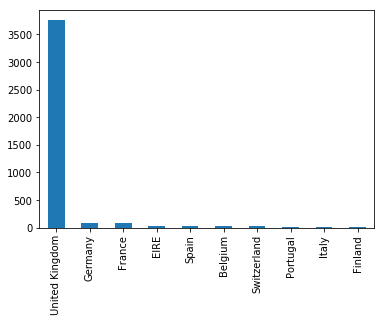

In [11]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

### Filtering necessary columns for RFM analysis

### RFM Score Calculations Simplified

Wondering how to calculate RFM scores for your customer database? Here’s how…
We need a few details of each customer:
- Customer ID / Email / Name etc – to identify them
- Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago? (Calculate the number of days between present date and date of last purchase each customer.)
- Frequency (F) as total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10. (Calculate the number of orders for each customer.)
- Monetary (M) as total money spent: How many dollars (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.(For Monetary, Calculate sum of purchase price for each customer.)

# RFM on Entire Data

In [12]:
df=data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Unnamed: 0       566309 non-null  int64         
 1   InvoiceNo        566309 non-null  object        
 2   StockCode        566309 non-null  object        
 3   QuantityShipped  566309 non-null  float64       
 4   Year             566309 non-null  int64         
 5   InvoiceDate      566309 non-null  datetime64[ns]
 6   UnitPrice        566309 non-null  float64       
 7   TotalSales       566309 non-null  float64       
 8   CustomerID       566309 non-null  int64         
 9   Country          566309 non-null  object        
 10  GM%              566309 non-null  float64       
 11  Shipper          566309 non-null  object        
 12  UnitCost         566309 non-null  float64       
 13  TotalCost        566309 non-null  float64       
 14  Region           566

In [14]:
df = df.drop(['Unnamed: 0'], axis =1)

In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'QuantityShipped', 'Year', 'InvoiceDate',
       'UnitPrice', 'TotalSales', 'CustomerID', 'Country', 'GM%', 'Shipper',
       'UnitCost', 'TotalCost', 'Region', 'SalesRep', 'Commodity',
       'SalePerson'],
      dtype='object')

In [16]:
df.describe()

,QuantityShipped,Year,UnitPrice,TotalSales,CustomerID,GM%,UnitCost,TotalCost
count,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000,566309.000000
mean,58.856724,2017.247344,1.269592,80.986009,15350.700681,0.076228,1.087992,67.899410
std,1264.412523,0.536288,1.010798,2012.332810,1731.767269,0.387442,0.585696,1517.514476
min,0.060000,2016.000000,0.084250,0.124477,12346.000000,-126.962574,0.000000,0.000000
25%,3.823200,2017.000000,0.951196,3.815059,13963.000000,-0.051465,0.854221,3.185624
50%,10.000000,2017.000000,1.097356,10.832956,15288.000000,0.046404,1.101769,9.340634
75%,24.000000,2018.000000,1.355904,27.259008,16921.000000,0.255980,1.260469,24.410862
max,664224.250000,2018.000000,188.185900,750849.719800,18287.000000,1.000000,33.942550,855425.223500


In [17]:
#Add new column depicting total amount/New GM Calculations
df['Revenue'] = df['QuantityShipped'] * df['UnitPrice']
df['nGM'] = (df['TotalSales'] - df['TotalCost'])/df['TotalSales']

In [18]:
#Check Oldest and Latest Dates in the DF
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2016-12-01 00:00:00'), Timestamp('2018-12-27 00:00:00'))

In [19]:
#Convert the string date field to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Set Latest date 2018-12-28 as last invoice date was 2018-12-27. 
#This is to calculate the number of days from recent purchase
PRESENT = dt.datetime(2018,12,28)

In [20]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
df.shape

(566309, 19)

In [21]:
df.head()

,InvoiceNo,StockCode,QuantityShipped,Year,InvoiceDate,UnitPrice,TotalSales,CustomerID,Country,GM%,Shipper,UnitCost,TotalCost,Region,SalesRep,Commodity,SalePerson,Revenue,nGM
0,568200,PADS,5.00,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,0.000023,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,GRACE J,4.999876,0.000023
1,568375,BANK CHARGES,5.00,2017,2017-09-26,0.999976,4.999883,13405,United Kingdom,1.000000,UPS Next day Air,0.000000,0.000000,WEST,JEFF Y,Studs,JEFF Y,4.999883,1.000000
2,561226,PADS,5.00,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,-0.000067,Delivery Truck,0.999953,4.999763,SOUTH,GRACE J,Studs,GRACE J,4.999428,-0.000067
3,2550193,PADS,7.08,2018,2018-06-08,0.999962,7.079728,13952,United Kingdom,0.000009,UPS ground 2nd day,0.999953,7.079664,CENTRAL,PETER T,Studs,PETER T,7.079728,0.000009
4,550193,PADS,5.00,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,0.000035,UPS ground 2nd day,0.999953,4.999763,CENTRAL,PETER T,Studs,PETER T,4.999940,0.000035


## RFM Modelling

In [22]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer

# RFM Modelling scores for each customer
rfm= df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                   'InvoiceNo': lambda num: len(num),
                                   'nGM': lambda x: x.sum()})

In [23]:
rfm.columns

Index(['InvoiceDate', 'InvoiceNo', 'nGM'], dtype='object')

In [24]:
#Convert Recency to type int
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

In [25]:
# Change the name of columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [26]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,233,2,-0.314336
12347,22,222,16.655479
12348,13,50,-1.097213
12349,402,69,5.213931
12350,149,33,1.323778


## RFM Descriptive Statistics

In [27]:
#Descriptive Statistics (Recency)
rfm.Recency.describe()

count    4146.000000
mean      213.103956
std       201.418923
min         1.000000
25%        24.000000
50%       111.000000
75%       412.000000
max       756.000000
Name: Recency, dtype: float64

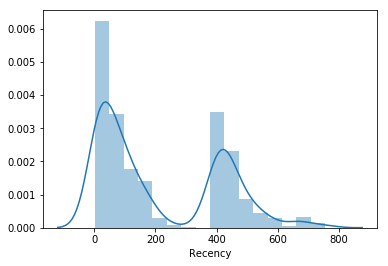

In [28]:
#Recency distribution plot
import seaborn as sns
x = rfm['Recency']

ax = sns.distplot(x)

In [29]:
#Descriptive Statistics (Frequency)
rfm.Frequency.describe()

count    4146.000000
mean      136.591655
std       359.871483
min         1.000000
25%        19.000000
50%        48.000000
75%       120.000000
max      8857.000000
Name: Frequency, dtype: float64

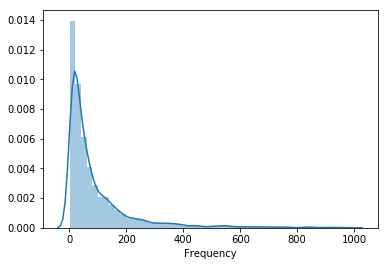

In [30]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = rfm.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [31]:
#Descriptive Statistics (Monetary)
rfm.Monetary.describe()

count    4146.000000
mean       10.412112
std        29.762330
min      -119.830687
25%         0.982014
50%         3.337544
75%         8.826937
max       597.356244
Name: Monetary, dtype: float64

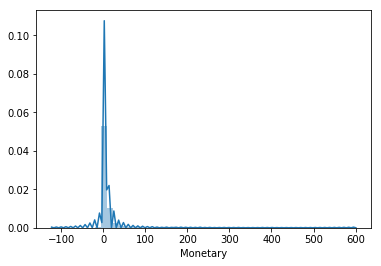

In [32]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

## RFM Scoring

In [33]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [34]:
quantiles

{'Recency': {0.25: 24.0, 0.5: 111.0, 0.75: 412.0},
 'Frequency': {0.25: 19.0, 0.5: 48.0, 0.75: 120.0},
 'Monetary': {0.25: 0.9820139111727176,
  0.5: 3.3375442483700373,
  0.75: 8.8269367075446}}

In [35]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [36]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm['R'] = rfm['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm['F'] = rfm['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm['M'] = rfm['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346,233,2,-0.314336,3,4,4
12347,22,222,16.655479,1,1,1
12348,13,50,-1.097213,1,2,4
12349,402,69,5.213931,3,2,2
12350,149,33,1.323778,3,3,3


In [37]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346,233,2,-0.314336,3,4,4,344,11
12347,22,222,16.655479,1,1,1,111,3
12348,13,50,-1.097213,1,2,4,124,7
12349,402,69,5.213931,3,2,2,322,7
12350,149,33,1.323778,3,3,3,333,9
12352,101,73,0.518985,2,2,4,224,8
12353,83,8,1.424623,2,4,3,243,9
12354,70,105,7.520103,2,2,2,222,6
12355,52,12,1.682480,2,4,3,243,9


In [38]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Level'] = Score_cuts.values
rfm.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
0,12346,233,2,-0.314336,3,4,4,344,11,Bronze
1,12347,22,222,16.655479,1,1,1,111,3,Platinum
2,12348,13,50,-1.097213,1,2,4,124,7,Gold
3,12349,402,69,5.213931,3,2,2,322,7,Gold
4,12350,149,33,1.323778,3,3,3,333,9,Silver
5,12352,101,73,0.518985,2,2,4,224,8,Gold
6,12353,83,8,1.424623,2,4,3,243,9,Silver
7,12354,70,105,7.520103,2,2,2,222,6,Gold
8,12355,52,12,1.682480,2,4,3,243,9,Silver
9,12356,93,50,1.530605,2,2,3,223,7,Gold


In [39]:
# Filter out Best customers
rfm[rfm['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
0,17841,3,8857,597.356244,1,1,1,111,3,Platinum
1,14911,6,5992,402.600288,1,1,1,111,3,Platinum
2,14606,3,4176,392.342236,1,1,1,111,3,Platinum
3,17377,12,4096,379.745911,1,1,1,111,3,Platinum
4,14237,8,3685,320.332698,1,1,1,111,3,Platinum
5,13767,8,2992,318.733857,1,1,1,111,3,Platinum
6,12748,5,5010,315.576670,1,1,1,111,3,Platinum
7,14849,9,3193,310.713320,1,1,1,111,3,Platinum
8,15640,3,3230,300.868075,1,1,1,111,3,Platinum
9,12471,9,3461,289.203448,1,1,1,111,3,Platinum


In [40]:
# Filter out Worst customers
rfm[rfm['RFMGroup']=='444'].sort_values('Monetary', ascending=False).reset_index().tail(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
304,16014,421,7,-1.048135,4,4,4,444,12,Bronze
305,17506,454,16,-1.141054,4,4,4,444,12,Bronze
306,16829,540,11,-1.456743,4,4,4,444,12,Bronze
307,14792,447,4,-1.518933,4,4,4,444,12,Bronze
308,16215,464,14,-2.061358,4,4,4,444,12,Bronze
309,14824,417,16,-2.511528,4,4,4,444,12,Bronze
310,17564,428,12,-2.844285,4,4,4,444,12,Bronze
311,12738,756,11,-3.443350,4,4,4,444,12,Bronze
312,14371,679,3,-3.485274,4,4,4,444,12,Bronze
313,12560,496,1,-4.005858,4,4,4,444,12,Bronze


In [41]:
#Created Excel CSV file of RFM table:
rfm.to_csv(r'C:\Users\harri\Google Drive\School\BUAN 6390 - Analytics Practicum\RFM GM DataFrame.csv')

## K-Means Clustering

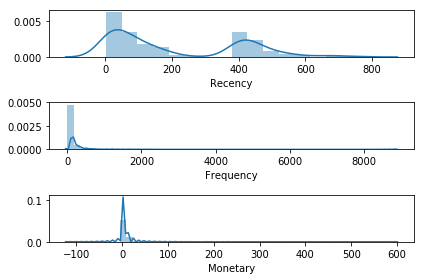

In [42]:
# plot the distribution of RFM values
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

In [43]:
# define function for the values below 0
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

# apply the function to Recency and MonetaryValue column 
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]
rfm['Monetary'] = [neg_to_zero(x) for x in rfm.Monetary]
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Level
CustomerID,,,,,,,,,
12346,233,2,1.000000,3,4,4,344,11,Bronze
12347,22,222,16.655479,1,1,1,111,3,Platinum
12348,13,50,1.000000,1,2,4,124,7,Gold
12349,402,69,5.213931,3,2,2,322,7,Gold
12350,149,33,1.323778,3,3,3,333,9,Silver


In [44]:
# unskew the data
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,5.451,0.693,0.000
12347,3.091,5.403,2.813
12348,2.565,3.912,0.000
12349,5.996,4.234,1.651
12350,5.004,3.497,0.280


In [45]:
rfm_log.describe()

,Recency,Frequency,Monetary
count,4146.000000,4146.000000,4146.000000
mean,4.619241,3.851107,1.215147
std,1.428747,1.424051,1.463844
min,0.000000,0.000000,-6.294000
25%,3.178000,2.944000,0.000000
50%,4.710000,3.871000,1.205000
75%,6.021000,4.787000,2.177500
max,6.628000,9.089000,6.393000


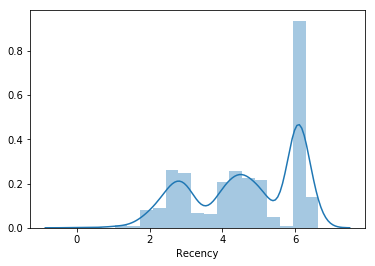

In [46]:
#Data distribution after data normalization for Recency
Recency_Plot = rfm_log['Recency']
ax = sns.distplot(Recency_Plot)

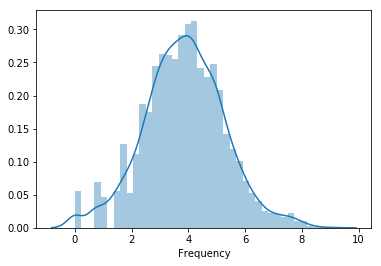

In [47]:
#Data distribution after data normalization for Frequency
Frequency_Plot = rfm_log.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

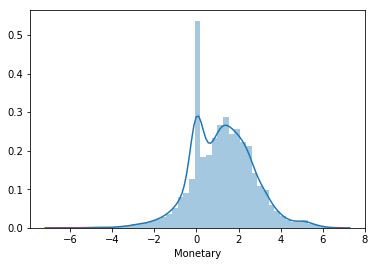

In [48]:
#Data distribution after data normalization for Monetary
Monetary_Plot = rfm_log.query('Monetary < 10000')['Monetary']
ax = sns.distplot(Monetary_Plot)

In [49]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

# transform into a dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,0.582230,-2.217960,-0.830207
12347,-1.069766,1.089905,1.091678
12348,-1.437965,0.042766,-0.830207
12349,0.963729,0.268909,0.297782
12350,0.269331,-0.248692,-0.638907


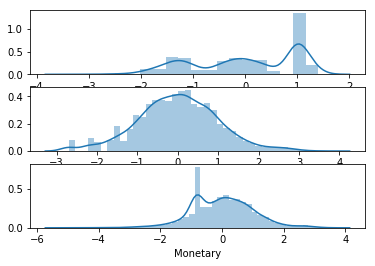

In [50]:
# plot the distribution of RFM values

#Data distribution after data normalization for Recency
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
#Data distribution after data normalization for Frequency
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, label = 'Frequency')
#Data distribution after data normalization for Monetary
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.show()

In [51]:
from sklearn.cluster import KMeans

# initiate an empty dictionary
wcss = {}

# Elbow method with for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_

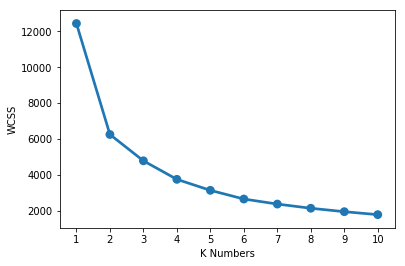

In [52]:
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

In [53]:
# choose n_clusters = 3
clus = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300)
clus.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
# Assign the clusters to datamart
rfm['K_Cluster'] = clus.labels_
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Level,K_Cluster
CustomerID,,,,,,,,,,
12346,233,2,1.000000,3,4,4,344,11,Bronze,2
12347,22,222,16.655479,1,1,1,111,3,Platinum,0
12348,13,50,1.000000,1,2,4,124,7,Gold,1
12349,402,69,5.213931,3,2,2,322,7,Gold,1
12350,149,33,1.323778,3,3,3,333,9,Silver,1


# Visualization

### Snake Plot
In marketing, snail plot and heatmap are often used plot for visualization. I'll use the `rfm_scaled` dataframe with normalized rfm values for the plot.

In [55]:
# assign cluster column 
rfm_scaled['K_Cluster'] = clus.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)

In [56]:
rfm_scaled.head()

,CustomerID,Recency,Frequency,Monetary,K_Cluster,RFM_Level
0,12346,0.582230,-2.217960,-0.830207,2,Bronze
1,12347,-1.069766,1.089905,1.091678,0,Platinum
2,12348,-1.437965,0.042766,-0.830207,1,Gold
3,12349,0.963729,0.268909,0.297782,1,Gold
4,12350,0.269331,-0.248692,-0.638907,1,Silver


In [57]:
# melt the dataframe
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,CustomerID,RFM_Level,K_Cluster,Metrics,Value
0,12346,Bronze,2,Recency,0.582230
1,12347,Platinum,0,Recency,-1.069766
2,12348,Gold,1,Recency,-1.437965
3,12349,Gold,1,Recency,0.963729
4,12350,Silver,1,Recency,0.269331


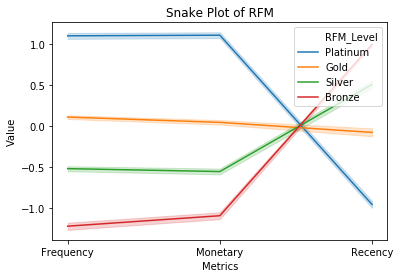

In [58]:
# a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

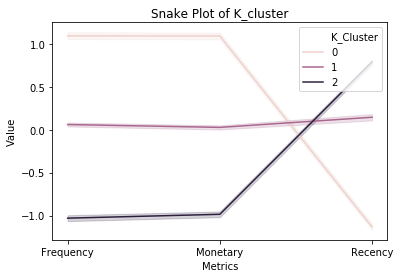

In [59]:
# a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

### Heatmap
Heatmap is efficient for comparing the standardized values. 

In [60]:
# the mean value for each cluster
cluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
cluster_avg.head()

,Recency,Frequency,Monetary
RFM_Level,,,
Platinum,49.909091,374.564463,29.959723
Gold,164.538146,64.532404,4.530053
Silver,290.466667,27.450273,1.917042
Bronze,444.875312,11.600998,0.909655


In [61]:
# the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg

Recency      213.103956
Frequency    136.591655
Monetary      10.674635
dtype: float64

In [62]:
# the proportional mean value
prop_rfm = cluster_avg/total_avg - 1
prop_rfm

,Recency,Frequency,Monetary
RFM_Level,,,
Platinum,-0.765799,1.742221,1.806627
Gold,-0.227897,-0.527552,-0.575625
Silver,0.363028,-0.799034,-0.820411
Bronze,1.087598,-0.915068,-0.914783


[]

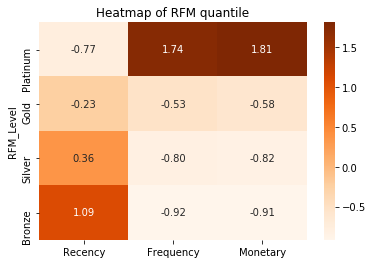

In [63]:
# heatmap
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('Heatmap of RFM quantile')
plt.plot()

In [64]:
# the mean value for each cluster
cluster_avg_K = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]

# the proportional mean value
prop_rfm_K = cluster_avg_K/total_avg - 1
prop_rfm_K

,Recency,Frequency,Monetary
K_Cluster,,,
0,-0.854826,1.837069,1.895932
1,-0.039270,-0.534799,-0.564850
2,0.793609,-0.888805,-0.900249


[]

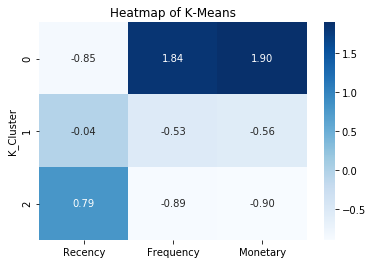

In [65]:
# heatmap
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('Heatmap of K-Means')
plt.plot()